# TRABALHO SIB

## Secção 1

### Exploração inicial e pré-processamento
• Rever toda a documentação disponível sobre o conjunto de dados.
• Carregar o conjunto de dados e realizar uma análise exploratória do mesmo.
• Realizar os passos necessários de preparação dos dados e pré-processamento,
incluindo possivelmente a geração de atributos, a sua seleção, o tratamento de
possíveis valores em falta, etc.

Esta etapa deve corresponder à secção 1 do Notebook onde deverá:
• descrever e caracterizar os dados atribuídos de acordo com a documentação/
literatura existente;
• descrever sucintamente as características dos dados disponíveis a partir da
análise exploratória inicial;
• descrever os passos de preparação dos dados e pré-processamento que efetuou,
justificando as suas escolhas;
• incluir os gráficos exploratórios iniciais que ilustrem as principais características
dos dados.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# para desenhar os gráficos dentro do notebook
import seaborn as sns
import xgboost as xgb
from html5lib._trie import py
from pygments.lexers import go
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import spearmanr
%matplotlib inline


• seq_id: unique identifier of each protein variants
• protein_sequence: amino acid sequence of each protein variant. The stability (as measured by tm) of protein is determined by its protein sequence. (Please note that most of the sequences in the test data have the same length of 221 amino acids, but some of them have 220 because of amino acid deletion.)
• pH: the scale used to specify the acidity of an aqueous solution under which the stability of protein was measured. Stability of the same protein can change at different pH levels.
• data_source: source where the data was published
• tm: target column. (Higher tm means the protein variant is more stable.)

In [ ]:
#read the csv file into a dataframe
df_train = pd.read_csv(r"D:\git\dream_challenge_\novozymes-enzyme-stability-prediction\train.csv")
df_train

In [ ]:
df_test = pd.read_csv(r"D:\git\dream_challenge_\novozymes-enzyme-stability-prediction\test.csv")
df_test

In [ ]:
train_updates = pd.read_csv(r'D:\git\dream_challenge_\novozymes-enzyme-stability-prediction\train_updates_20220929.csv')

In [ ]:
df_append = pd.DataFrame()
df_append = df_append.append(df_test, ignore_index=True)
df_append = df_append.append(df_train, ignore_index=True)
df_append

In [ ]:
data=df_append

In [ ]:
data.shape

Fazer drop dos valores dos indices que estavam no update

In [ ]:
for seq_id in train_updates.seq_id:
    data = data.drop(index = seq_id)

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
### Sumario dos dados

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data=data[data['pH']<14]

data.shape

In [ ]:
### Visualização dos dados

In [ ]:
sns.displot(data=data,x='pH', color="magenta")
plt.xlabel("pH")
plt.show()

In [ ]:
sns.displot(data=data,x='tm', color="cyan")
plt.xlabel("Tm")
plt.show()

In [ ]:
aminos = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for letter in aminos:
    df_train[letter] = df_train.protein_sequence.str.count(letter)
    df_test[letter] = df_test.protein_sequence.str.count(letter)

In [ ]:
df_train=df_train.dropna()

In [ ]:
df_train.shape

## Análise não supervisionada

• Usar as técnicas de redução de dimensionalidade adequadas aos seus dados;
• Usar as técnicas de visualização de dados multivariadas adequadas aos seus
dados;
• Aplicar métodos de clustering que considere adequados aos seus dados.

## PCA

In [ ]:
df = df_train[['tm', 'pH','A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']].copy()
df=df.dropna()
df

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
data_scaled= preprocessing.scale(df)
n=2
pca = PCA(n_components=n)
pca.fit(data_scaled)
x_reduced = pca.transform(data_scaled)

print (pca.explained_variance_ratio_)
print('Shape before PCA: ', data_scaled.shape)
print('Shape after PCA: ', x_reduced.shape)

import plotly.express as px
fig = px.scatter(x_reduced, x=0, y=1)
fig.show()

# Métodos de clustering


## K-Means Clustering
K-Means clustering is the most popular unsupervised machine learning algorithm and is used to find intrinsic groups within the unlabelled dataset and draw inferences from them.

#### Declare feature vector and target variable

In [ ]:
X = df

y = df['pH']
y

#### Convert categorical variable into integers

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['pH'] = le.fit_transform(X['pH'])

y = le.transform(y)

#### View the summary of X

In [ ]:
X.info()

#### Preview the dataset X

In [ ]:
X.head()

#### Feature Scaling

In [ ]:
cols = X.columns
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

#### K-Means model with two clusters

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

#### K-Means model parameters study

In [90]:
kmeans.cluster_centers_


array([[0.36259869, 0.73987213, 0.10240066, 0.05768338, 0.08704143,
        0.09859453, 0.20499051, 0.13494052, 0.10104502, 0.14088979,
        0.10773314, 0.10922784, 0.13660318, 0.12962059, 0.09118702,
        0.08392908, 0.15511089, 0.13936778, 0.10792451, 0.14552998,
        0.10146058, 0.17690643],
       [0.39958086, 0.72718053, 0.03041627, 0.01361666, 0.02312447,
        0.02518691, 0.05972762, 0.04250409, 0.02559894, 0.04173459,
        0.02944787, 0.02883022, 0.03932616, 0.0336823 , 0.02221004,
        0.01863733, 0.04177747, 0.03087404, 0.02785402, 0.04214161,
        0.03058241, 0.05386017]])

### Inertia

Inertia is not a normalized metric. The lower values of inertia are better and zero is optimal.
But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).
Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.


In [91]:
kmeans.inertia_

1103.8483667408698

• The lesser the model inertia, the better the model fit.

Our model has very high inertia of 572.8
So, this is not a good model fit to the data


#### Check quality of weak classification by the model

In [92]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 95 out of 27769 samples were correctly labeled.


In [93]:
print('Accuracy score: {0:0.4f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.0034


We have achieved a weak classification accuracy of 0,3 % by our unsupervised model.

#### The Elbow Method

The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K.

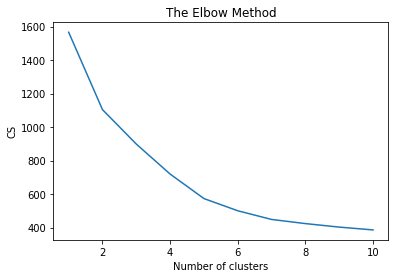

In [94]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

•  By the above plot, we can see that there is a kink at k=2 and k=5.

Next, we check the accuracy for the k=2 and k=5


In [95]:
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.4f}'. format(correct_labels/float(y.size)))

Result: 95 out of 27769 samples were correctly labeled.
Accuracy score: 0.0034


In [96]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.4f}'. format(correct_labels/float(y.size)))

Result: 5 out of 27769 samples were correctly labeled.
Accuracy score: 0.0002


By changing the value of K, we achieved a higher classification accuracy of 0,3% with k=2. We conclude that k=2 is the optimal number of clusters.

## Hierarchical Clustering: Agglomerative Clustering Algorithm

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

#### Agglomerative Clustering
This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy

In [97]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(df)
y_hc

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [131]:
df['cluster'] = pd.DataFrame(y_hc)
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'],
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

AttributeError: module 'pygments.lexers.go' has no attribute 'Scatter3d'

In [ ]:
X = df.iloc[:, [3,4]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

In [ ]:
df.head()

In [ ]:
df.to_csv("segmented_customers.csv", index = False)

## Aprendizagem máquina
Comparar o comportamento de diversos modelos/ algoritmos de Aprendizagem Máquina no conjunto de dados. Deverá analisar o comportamento dos algoritmos calculando métricas de erro apropriadas e usando métodos de estimação do erro adequado. Deverá ainda apresentar o melhor modelo a que consiga chegar para os dados disponíveis, usando todos os exemplos, interpretando-o quando tal for possível.

In [ ]:
X = df_train.drop(columns = ['tm','protein_sequence','data_source'])
y = df_train['tm']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 11)

In [ ]:
# parameters tuned separately
model1 = xgb.XGBRegressor(n_estimators = 170, max_depth = 5)
model1.fit(X_train, y_train)
predictions1 = model1.predict(X_test)

Mean Squared Error, or MSE, is error metric for regression problems.
The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.


In [ ]:
mse=mean_absolute_error(y_test, predictions1)
print('Mean Absolute Error = %.2f' %mse)

In [ ]:
score = model1.score(X_train, y_train)
print("Training score: ", score)

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predictions1, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
pecc_knn = cross_val_score(knn_model, X_train, y_train, cv = 5).mean()
pecc_knn

In [ ]:
model_KNR = KNeighborsRegressor()
model_KNR.fit(X_train, y_train)
predictions1 = model_KNR.predict(X_test)
mse=mean_absolute_error(y_test, predictions1)
print('Mean Absolute Error = %.2f' %mse)

In [ ]:
from sklearn import svm

model_svm = svm_model = svm.SVR()
model_svm.fit(X_train, y_train)
predictions1 = model_svm.predict(X_test)
mse=mean_absolute_error(y_test, predictions1)
print('Mean Absolute Error = %.2f' %mse)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, y_train)
predictions1 = model_rfr.predict(X_test)
mse=mean_absolute_error(y_test, predictions1)
print('Mean Absolute Error = %.2f' %mse)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model_AB = AdaBoostRegressor()
model_AB.fit(X_train, y_train)
predictions1 = model_AB.predict(X_test)
mse=mean_absolute_error(y_test, predictions1)
print('Mean Absolute Error = %.2f' %mse)

In [ ]:
score = model_rfr.score(X_train, y_train)
print("Training score: ", score)

In [ ]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
predictions_LR = model_LR.predict(X_test)
mse=mean_absolute_error(y_test, predictions_LR)
print('Mean Absolute Error = %.2f' %mse)

In [ ]:
score = model_LR.score(X_train, y_train)
print("Training score: ", score)